In [1]:

import numpy as np 
import os 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = "/kaggle/input/dataset/data/Training" 
test = "/kaggle/input/dataset/data/Testing" 
validation = "/kaggle/input/dataset/data/Validation"

In [4]:
base_path = "/kaggle/input/dataset/data"
for dataset_type in ["Training", "Testing" ,"Validation"]:
    dataset_path = os.path.join(base_path, dataset_type)
    print(f"\n {dataset_type}:")
    if os.path.exists(dataset_path):
        classes = os.listdir(dataset_path)
        for cls in classes:
            class_path = os.path.join(dataset_path, cls)
            if os.path.isdir(class_path):  
                image_count = len([f for f in os.listdir(class_path) 
                                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
                print(f"{cls}: {image_count} ")
    else:
        print("not found ")



 Training:
OC: 324 
CaS: 480 
OT: 393 
CoS: 450 
Gum: 360 
MC: 540 
OLP: 540 

 Testing:
OC: 108 
outputs: 160 
output: 160 
CaS: 160 
out: 160 
OT: 131 
CoS: 149 
Gum: 120 
MC: 180 
OLP: 180 

 Validation:
OC: 108 
CaS: 160 
OT: 131 
CoS: 149 
Gum: 120 
MC: 180 
OLP: 180 


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train = "/kaggle/input/dataset/data/Training" 
test = "/kaggle/input/dataset/data/Testing" 
validation = "/kaggle/input/dataset/data/Validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_ds = train_datagen.flow_from_directory(
    train,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_ds = val_datagen.flow_from_directory(
    validation,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


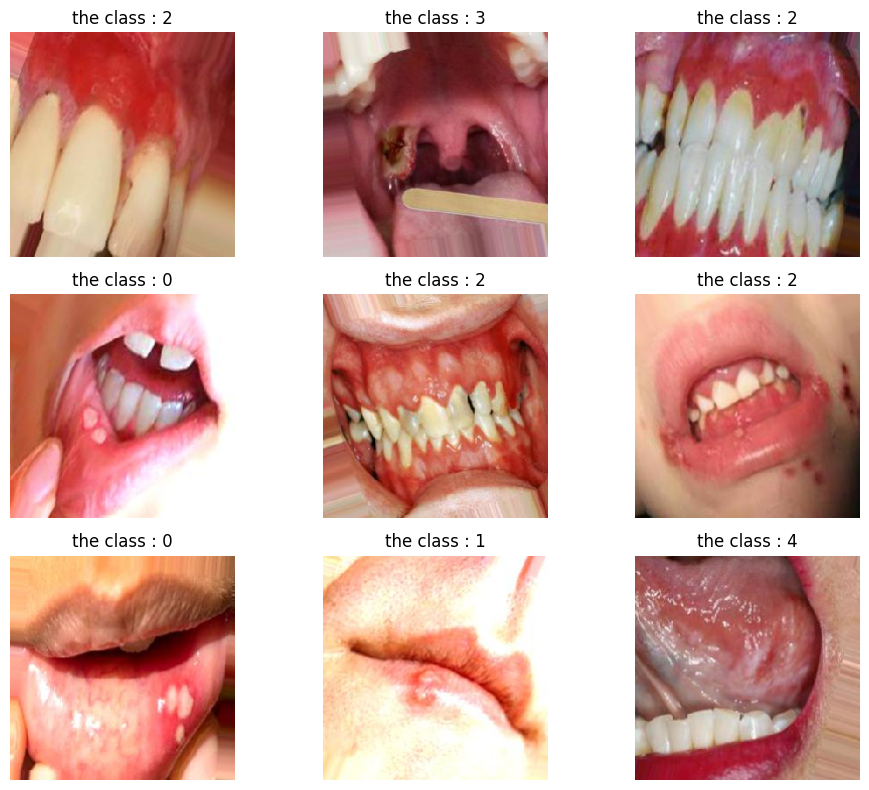

In [10]:
import matplotlib.pyplot as plt  
images , labels = next(iter(val_ds)) 
num_image = 9
plt.figure(figsize=(10,8)) 
for i in range(num_image):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i]) 
    plt.title(f"the class : {np.argmax(labels[i])}") 
    plt.axis("off") 

plt.tight_layout() 
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPool2D, Dropout ,BatchNormalization
from tensorflow.keras.models import Sequential , Model
from sklearn.metrics import classification_report, confusion_matrix 
import tensorflow as tf
from tensorflow.keras import layers, models, Input, regularizers

In [17]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model_MobileNetV2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model_MobileNetV2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_MobileNetV2.summary()
     


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath="best_teeth_model.h5",
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1
)

In [20]:
history = model_MobileNetV2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=checkpoint
)
     


Epoch 1/100


I0000 00:00:1758109894.801257     132 service.cc:148] XLA service 0x7e9e18010130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758109894.802220     132 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758109894.802239     132 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758109895.647920     132 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/97 ━━━━━━━━━━━━━━━━━━━━ 18:28 12s/step - accuracy: 0.2812 - loss: 2.0778

I0000 00:00:1758109899.761451     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.4817 - loss: 1.4348
Epoch 1: val_accuracy improved from -inf to 0.75292, saving model to best_teeth_model.h5
97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 561ms/step - accuracy: 0.4828 - loss: 1.4317 - val_accuracy: 0.7529 - val_loss: 0.7013
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7057 - loss: 0.7947
Epoch 2: val_accuracy improved from 0.75292 to 0.80253, saving model to best_teeth_model.h5
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 364ms/step - accuracy: 0.7059 - loss: 0.7943 - val_accuracy: 0.8025 - val_loss: 0.5417
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7813 - loss: 0.6192
Epoch 3: val_accuracy improved from 0.80253 to 0.81712, saving model to best_teeth_model.h5
97/97 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.7814 - loss: 0.6190 - val_accuracy: 0.8171 - val_loss: 0.4634
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8205 - loss: 0.4906
Epoch 4: val_accuracy improved from 0

In [21]:
train_loss, train_acc = model_MobileNetV2.evaluate(train_ds)
print(f"the train accuracy {train_acc*100:.2f}%")

val_loss, val_acc = model_MobileNetV2.evaluate(val_ds)
print(f"the validation accuracy {val_acc*100:.2f}%")


97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 360ms/step - accuracy: 0.9868 - loss: 0.0407
the train accuracy 98.54%
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9867 - loss: 0.0351
the validation accuracy 98.25%


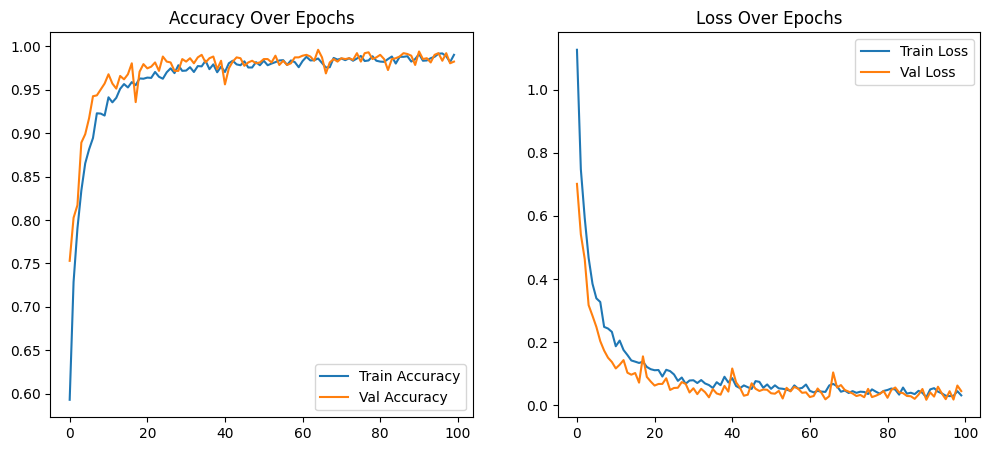

In [22]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


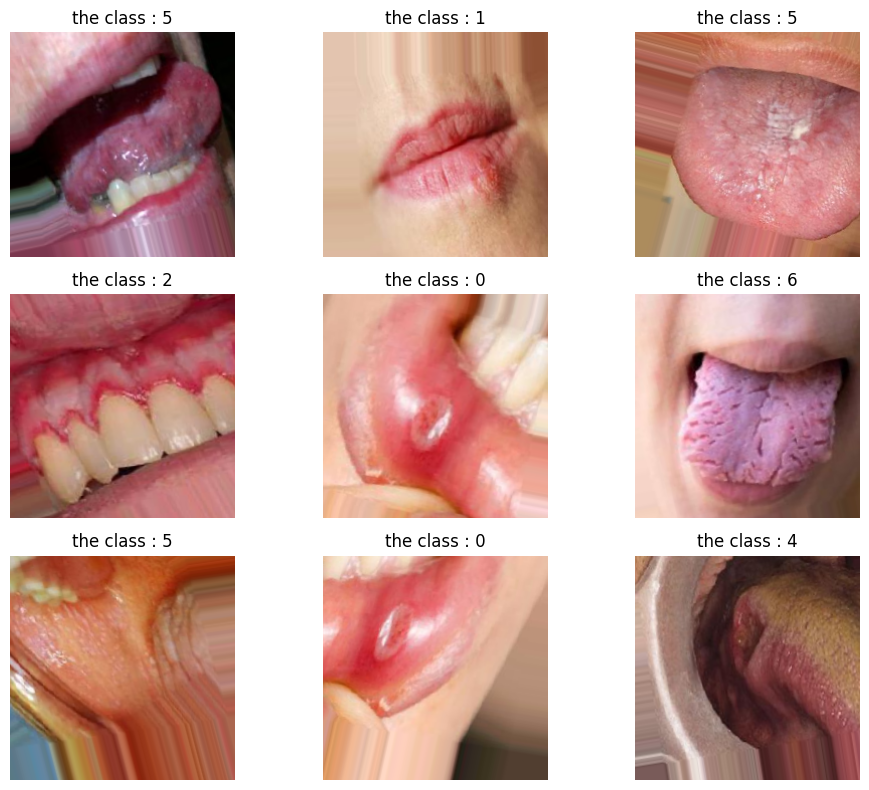

In [23]:
import matplotlib.pyplot as plt  
images , labels = next(iter(train_ds)) 
num_image = 9
plt.figure(figsize=(10,8)) 
for i in range(num_image):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i]) 
    plt.title(f"the class : {np.argmax(labels[i])}") 
    plt.axis("off") 

plt.tight_layout() 
plt.show()


In [30]:
model_MobileNetV2.save("Teeth.h5")

In [ ]:
y_true = [] 
y_pred = [] 
for images , labels in val_ds : 
    pred = model_MobileNetV2.predict(images) 
    y_pred.extend(np.argmax(pred , axis=1))
    y_true.extend(np.argmax(labels , axis=1)) 


y_true = np.argmax(y_true) 
y_pred = np.argmax(y_pred)



In [ ]:
from sklearn.metrics import classification_report
class_name  = list(val_ds.class_indices_key())

print(classification_report(y_true , y_pred , target_name = class_name))